# Problem Set 1


## An econometric analysis of Engel curves for Canadian households
The aim of problem sets 1 and 2 is to carry out an empirical analysis of Engel curves. As
you know from Micro A, Engel curves describe how demand for individual products or a
group of products depend on income at given prices. For this analysis, we will use a data
set containing information on a large number of Canadian households. The data file is included with this Jupyter Notebook in the PS1 folder on GitHub.

The econometric analysis includes several steps. Problem set 1 focuses on selecting, transforming and describing the relevant variables for the analysis. In Problem set 2, we estimate
Engel curves using regression analysis and relate the results to economic theory.
In order to develop a bit the intution, the following plot illustrates Engel curves for necessities vs luxuries:

![Engel Curves](./engel_curves.png)


### Data

The data are taken from the Canadian Consumer Expenditure Survey. Selected households
from 5 regions of Canada have kept a diary of all their expenses for a period of two weeks
in 1992. These expenses have been combined in a number of categories. Our data contains
the following 11 expenditure categories:

| **Expenditure Category** | **Description**                                                    |
|----------|--------------------------------------------------------------------|
| fath     | Food (food at home)                                                |
| rest     | Restaurant                                                         |
| hhop     | Phone, cleaning, childcare, electricity, water (household operations) |
| wcloth   | Women’s clothing                                                   |
| mcloth   | Men’s clothing                                                     |
| caruse   | Consumption for car use                                            |
| tran     | Transportation                                                     |
| care     | Medicine, doctor, and dentist                                      |
| recr     | Recreation                                                         |
| tob      | Tobacco                                                            |
| alc      | Alcohol                                                            |


In the data set, the variables are named such that _xcategory_ refers to expenditures in that
particular _category_. E.g., the _xfath_-variable indicates expenditures on food. In problem set
1, we will focus on an analysis of food, alcohol and men’s and women’s clothing.

To make the analysis as simple as possible, the data set is restricted to include observations of a cross-section collected in 1992. The cross-section contains only singles without
children (i.e., households with only one member).

The data set also contains some demographic information. We will use the variable _dmale =
1_ if the person is male, _dmale = 0_ if the person is female. The fact that the survey was conducted in 1992 might help explain why it does not include indicator variables for any other genders.



## Group work
Discuss the questions below in groups of max 3 people. Each group should first choose a
spokesperson who reports for the group in the subsequent class discussion. The teacher is
present and can help clarify issues as you go along.

A crucial step in an econometric analysis is to ”translate” economic theory in order to
relate it to data and empirical measures. Among other things, this requires you to consider
which variables you want to use in the analysis, and whether to transform them or construct
new variables.

 ### Question 1: Recap of demand theory from Micro A
Consider an economy with $N$ different goods.
- Let $p_i$ denote the price of good $i \in \{1, 2, ..., N\}$ 
- Let $x_i$ denote the amount of units of good $i$ a person demands/consumes (if good $i$ is tomatoes, $x_i$ is the number of tomatoes a person purchases)
---

**Task:**
1. What would we call the variable $p_i x_i$? (what is the interpretation?)

1. What would we call $\sum p_i x_i$?

1. What would we call $w_i = p_i x_i / \sum p_i x_i$ ?

**Your answer:**

1. 
It's the demand for a given person for a given product
2.
The total demand
3. 
Relative demand?

### Question 2: Preparing our analysis
Assume that we want to analyze the correlation between the demand for alcohol and household income.

Remember that household income $Y$ in a period can be deconstructed as $Y = C + S$ where $C$ is total consumption in the period and $S$ is savings.

In this dataset, we observe consumption, but neither income nor savings. If we assume $S=0$, we can use consumption as proxy for household income in the observed period. This simplifies the problem, as we don't have to take into account intertemporal saving behaviour.

---
**Task:**
1. How would we compute the total expenditure for an individual in the dataset?

1. Do we know the prices of the individual goods in the dataset? (can we isolate $p_i$)?

1. What are some advantages of working with expenditure shares instead of expenditure in absolute terms?

1. All households in the survey are single-member – in other words: only one person lives in each household. Why is this an advantage in terms of our empirical analysis?

**Your answer:**

1.
We sum up the individual expenditures for the different vares
2.
If we have the consumption and the amount then yes, you can isolate for the prices
3.
It's more flexible
4.
Because then you don't have to calculate or guess how much of the total household consumption comes from one person instead of the other. It's easier to work with

## Python exercise: Descriptive analysis
After having identified the relevant variables, it is time to take a look at the data. A
descriptive analysis should be the first step in any empirical analysis. The aim is both to get
an overview of the structure of data and also to check whether the data ”looks reasonable”.
Often, the data is put together from multiple sources or is drawn from a larger data set. It
therefore makes sense to look whether all relevant observations and variables are included
(e.g. are there both men and women in our dataset? Is there information on all relevant
consumption categories? Are there observations with errors such as negative consumption
values?). This initial descriptive analysis is the focus of the first Python exercise.


### Exercise 1: Load the data
Data is in the file _engel.dta_ which is included in the PS1 folder on GitHub. 

To work with the data in Python, we will use the Pandas library, which you can import using this command: 
```py
import pandas as pd
```

Then, you can load the dataset as a Pandas DataFrame using the command:
```py
pd.read_stata('engel.dta')
``` 
Note that the data file must be located in the same folder as this notebook – otherwise, you have to adjust the relative path accordingly.

Make sure to assign the DataFrame to a variable so we can access it later. You can name the DataFrame variable anything you like, but often we use `df`.

---

**Task:** Load the data and assign it to a variable

**Your code:**

In [4]:
import pandas as pd
df = pd.read_stata('engel.dta')
df

,year,province,hgy,hage,nety,xfath,xrest,xhhop,xwcloth,xmcloth,...,pcaruse,pcare,stonep,price,rxtot,xtot,wfath,wwcloth,wmcloth,walc
0,92.0,4.0,27521.0,28.0,22892.0,870.0,1110.0,552.0,2995.0,0.0,...,228.363876,203.841293,5.554568,258.415375,48.956066,12651.0,0.068769,0.236740,0.000000,0.041894
1,92.0,4.0,41000.0,24.0,29000.0,2710.0,850.0,835.0,1490.0,0.0,...,228.363876,203.841293,5.407431,223.057739,44.979385,10033.0,0.270109,0.148510,0.000000,0.039868
2,92.0,1.0,21268.0,39.0,17564.0,2300.0,956.0,1514.0,845.0,0.0,...,236.936798,197.392685,5.467818,236.942688,53.928654,12778.0,0.179997,0.066129,0.000000,0.000000
3,92.0,3.0,55296.0,39.0,40296.0,3060.0,1010.0,780.0,3950.0,0.0,...,284.803314,223.677643,5.405071,222.531967,59.991383,13350.0,0.229213,0.295880,0.000000,0.008240
4,92.0,2.0,16612.0,41.0,16464.0,1600.0,990.0,1240.0,2072.0,0.0,...,272.327911,221.057159,5.498469,244.317566,47.900772,11703.0,0.136717,0.177049,0.000000,0.011963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,92.0,4.0,40650.0,34.0,27410.0,1815.0,260.0,2019.0,0.0,900.0,...,228.363876,203.841293,5.387685,218.696579,56.845882,12432.0,0.145994,0.000000,0.072394,0.005631
446,92.0,1.0,34000.0,33.0,27000.0,2415.0,1250.0,5809.0,0.0,785.0,...,236.936798,197.392685,5.417481,225.310837,76.578651,17254.0,0.139968,0.000000,0.045497,0.017967
447,92.0,3.0,25032.0,27.0,21752.0,1040.0,3555.0,1887.0,0.0,1025.0,...,284.803314,223.677643,5.626803,277.772766,59.591877,16553.0,0.062828,0.000000,0.061922,0.164562
448,92.0,5.0,39000.0,30.0,29069.0,2020.0,1940.0,1111.0,0.0,1300.0,...,279.678772,214.639633,5.554645,258.435211,71.015862,18353.0,0.110064,0.000000,0.070833,0.108429


### Exercise 2: Examine the data
You can get an overview of the data by calling the variable you assigned the DataFrame to. If you named the variable `df`, you simply run the command `df` to get an overview.

A few basic Pandas tips:

- To see the names of the variables in the dataframe, you can run `df.columns`

- To get the dimensions of a DataFrame, you can use `df.shape`

- To access a specific column (for example, the _xalc_ column), you can either use `df['xalc']` or `df.xalc`

If you want to create a view of the DataFrame where you only see a list of specific variables, you can index the DataFrame using a list of labels. For example, to create a view that only shows the alcohol, tobacco and recreation expenditures, you can use the code:

```py
vars = ['xalc', 'xtob', 'xrecr']
df[vars]
```
or alternatively the one-liner:
```py
df[['xalc', 'xtob', 'xrecr']]
```

You can also index the DataFrame based on conditional logic. This is basically the same thing as using a filter in Excel. For example, if I want to only see the households where tobacco consumption is greater than 500, I would use the code:
```py
I = df.xtob > 500
df[I]
```

The first line above creates a boolean vector `I` that is True or False for each household depending on whether their tobacco consumption is greater than 500 or not. In the second line, I use this vector to 'filter' the DataFrame so only the households satisfying the condition show up in the resulting view.

This can also be done in a one-liner:
```py
df[df.xtob > 500]
```
It is possible to combine multiple 'filters':
```py
df[(df.xtob > 500) & (df.xalc < 1000)]
```
---
**Task:** Now, using the tools described above, answer these questions:
1. How many households are there in the data set? 

1. What information is provided for each household? 

1. How many households spent more than 3000 on food expenditures during the survey?

1. Are there households with negative food expenditures, and is it realistic? The purpose of this question is to verify that the data does not contain error observations.




**Your code:**


In [12]:
#1
print(df.shape)

#2
print(df.columns)

#3
print(df[df.xfath > 3000].shape)

#4
print(df[df.xfath<0].shape)


(450, 43)
Index(['year', 'province', 'hgy', 'hage', 'nety', 'xfath', 'xrest', 'xhhop',
       'xwcloth', 'xmcloth', 'xtran', 'xcare', 'xrecr', 'xtob', 'xalc',
       'pfath', 'prest', 'phhop', 'ptran', 'precr', 'ptob', 'palc', 'pwcloth',
       'pmcloth', 'dmale', 'down', 'dcity', 'dcar', 'dhlangf', 'dhlango',
       'dheduc', 'dhoccup', 'xcaruse', 'pcaruse', 'pcare', 'stonep', 'price',
       'rxtot', 'xtot', 'wfath', 'wwcloth', 'wmcloth', 'walc'],
      dtype='object')
(65, 43)
(0, 43)


**Your comments (explain your answers in plain text):**

1. 450 households
2. 11 categories plus additional information
3. 65 spends more than 3000
4. There is no household with negative food expenditures, which makes sense since everyone need to eat

### Exercise 3: Compute total expenditure

We can add new variables (columns) to a DataFrame in a similar way to how we assign values to other variables in Python.

For instance, if we wanted to add a variable to the DataFrame containing the total clothing expenditures for each household, we could use this code: 
```py
df['xcloth_total'] = df['xwcloth'] + df['xmcloth']
``` 

This creates a new variable in the DataFrame called _xcloth_total_ that contains the sum of the expenditures on men's clothing and women's clothing for each household.

If we want to calculate a sum across many variables, we can first create a view of our DataFrame containing just those variables, and then use the `.sum()` method. For example, we could compute the sum of alcohol, tobacco and recreation expenses using the code:
```py
vars = ['xtob', 'xalc', 'xrecr']
df[vars].sum(axis=1)
```
The argument `axis=1` tells Pandas to compute the horizontal sum instead of the vertical sum in the DataFrame. Specifying `axis=0` would take the sum across all observations instead of across the chosen variables. Be aware that if you just use `.sum()` without specifying the axis, it will default to 0.



---
**Task:** Now, construct a variable in the DataFrame for total expenditures across all 11 expenditure categories.

**Your code:**

In [17]:
vars = ['xfath', 'xrest', 'xhhop',
       'xwcloth', 'xmcloth', 'xtran', 'xcare', 'xrecr', 'xtob', 'xalc', 'xcaruse']
df['total']=df[vars].sum(axis = 1)

### Exercise 4: Construct expenditure shares for food, clothes and alcohol
**Task:** Create three new variables in the DataFrame where you compute the expenditure share for the food, clothes and alcohol categories. In other words: Calculate how big a percentage of the total expenditures each of these categories constitute.




**Your code:**

In [20]:
df['procentFath'] = df.xfath/df.total
df['procentCloth'] = (df.xwcloth+df.xmcloth)/df.total
df['procentAlc'] = df.xalc/df.total

### Exercise 5: Explore the data using scatter plots


To make visualizations based on Pandas DataFrames, we can use the library Seaborn. You can import Seaborn using the code:

```python
import seaborn as sns
```

To create a scatterplot using seaborn, we use the `sns.scatterplot()` method. This method allows us to specify a variable for the x-axis, for the y-axis and the DataFrame to grab the data from. For example, to explore the relationship between alcohol and tobaco consumption,  we can specify: 

```python
sns.scatterplot(x='xalc', y='xtob', data=df)
```

To learn more about how to use this method, you can run the code `?sns.scatterplot`. This is a great way of exploring various methods included in other libraries (such as Pandas) too.

If we want to create multiple scatterplots where we subdivide the data based on a category (for example, by gender), we can use the method `sns.relplot()` instead of `sns.scatterplot()`. The syntax for `sns.relplot()` is very similar, but it allows us to add an extra `col` argument to specify which variable we should use to categorize the data. For example, to explore the relationship between alcohol and tobaco consumption by gender, we can use this command: 

```python
sns.relplot(x='xalc', y='xtob', col='dmale', data=df)
```
Remember: the variable _dmale_ indicates if a person is male (1) or woman (0).

You can learn more about Seaborn in general here: https://seaborn.pydata.org/tutorial/introduction.html

---

**Task:** Now, plot the expenditure share on food against total
expenditures for men and women, respectively. Do the same for expenditure shares on
clothes and alcohol.
Do you generally see a positive, negative or no correlation between the expenditure
share on food (clothing, alcohol) and total expenditures?



**Your code:**

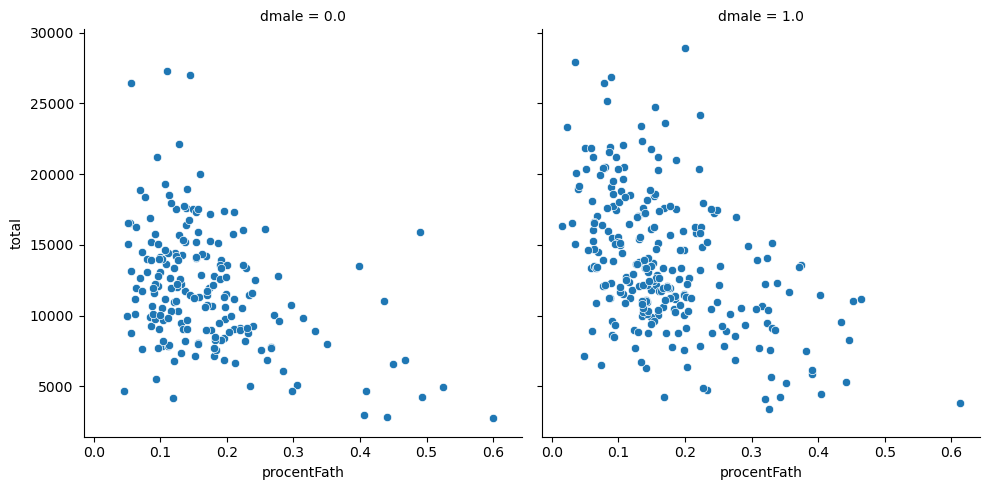

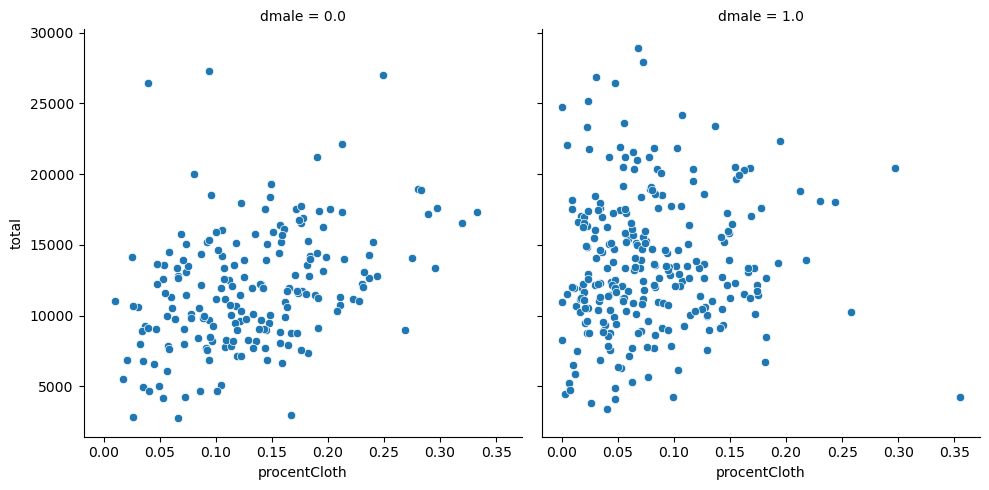

In [24]:
import seaborn as sns
sns.relplot(x='procentFath', y='total', col='dmale', data=df)
sns.relplot(x='procentCloth', y='total', col='dmale', data=df)


**Your comments (explain your answers in plain text):**

The food expenditure generally has a negative correlation between that and the total. As the total goes up, the food expenditure goes up as well.
There doesn't really seem to be a visiable correlation when it comes to the cloth



### Exercise 6: Do a brief descriptive analysis
We can easily compute summary statistics (such as the mean, standard deviation and different quantiles) for variables in a Pandas DataFrame by using the `df.describe()` method.

If we want to group the data by some category, e.g. gender, we can use the method `df.groupby('dmale')` before we use the `.describe()` method. 

Alternatively, we can manually limit the DataFrame view to a specific category before we use the describe method. Then we need to do two tables:
```py
df[df.dmale == 1].describe()
df[df.dmale == 0].describe()
```

Before using the `.describe()` method, we usually need to create a view where we narrow down our DataFrame so it only shows the variables of interest. Otherwise, the resulting table becomes way too big – especially when we also group by categories. If for example we want to compute descriptive statistics for only the alcohol, tobacco and recreation expenditure variables, you can use the code:
```py
vars = ['xalc', 'xtob', 'xrecr']
df[vars].describe()
```
or you  can do a one-liner:
```py
df[['xalc', 'xtob', 'xrecr']].describe()
```

**Tip:** If you still end up having too many variables to comfortably fit on the screen, it can sometimes help to transpose the table – such that the variables are the rows and the statistics are the columns. To do this, simply add `.T` at the end of your command: `df.describe().T`.

**Tip:** If you want to round the output of a Pandas DataFrame to 3 decimal points, you can add `.round(3)` at the end of your command: `df.describe().round(3)`

---

**Task:** Now, carry out a brief descriptive analysis of the three expenditure share variables we constructed in exercise 3 as well as total consumption **for each gender**. Comment briefly on the table while you highlight main features of the
data, and possibly error observations.

**Your code:**

In [35]:
vars = ['procentFath', 'procentCloth', 'procentAlc', 'total']
df.groupby('dmale')[vars].describe().T.round(3)

dmale                     0.0        1.0
procentFath  count    192.000    258.000
             mean       0.170      0.170
             std        0.097      0.096
             min        0.046      0.015
             25%        0.104      0.101
             50%        0.147      0.149
             75%        0.200      0.206
             max        0.599      0.613
procentCloth count    192.000    258.000
             mean       0.132      0.079
             std        0.066      0.057
             min        0.010      0.000
             25%        0.083      0.037
             50%        0.124      0.067
             75%        0.174      0.111
             max        0.333      0.355
procentAlc   count    192.000    258.000
             mean       0.036      0.075
             std        0.047      0.077
             min        0.000      0.000
             25%        0.008      0.019
             50%        0.022      0.052
             75%        0.048      0.102
             max        0.354      0.349
total        count    192.000    258.000
             mean   11855.099  13645.043
             std     4236.573   4802.609
             min     2746.000   3374.000
             25%     8996.750  10485.250
             50%    11577.000  12918.500
             75%    14244.250  16609.250
             max    27255.000  28925.000

**Your comments (answer in plain text):**